In [1]:
import os
import pandas as pd
from textblob import *
import nltk
import numpy as np
import openpyxl
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


'''Start with WELFAKE'''

FILENAME = r"../data/Des_fake_news/LIAR_PROCESSED.csv"
data = pd.read_csv(FILENAME)
data



,Unnamed: 0,id,class,text,title,speaker,job title,state,party,barelytrues,...,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,0,11972.json,1,Building a wall on the U S Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.000,0.000,1.000,0.000
1,1,11685.json,0,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.000,0.000,0.894,0.106
2,2,11096.json,0,Says John McCain has done nothing to help the ...,military veterans voting record,donald-trump,President-Elect,New York,republican,63,...,0.000000,0.000000,-0.100000,0.100000,0.0,1.000,0.000,0.201,0.799,0.000
3,3,5209.json,0,Suzanne Bonamici supports a plan that will cut...,medicare message machine campaign advertising,rob-cornilles,consultant,Oregon,republican,1,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.000,0.127,0.602,0.271
4,4,7070.json,1,Says that Tennessee law requires that schools ...,county budget county government education taxes,stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0,...,-0.166667,0.166667,0.000000,0.000000,0.0,1.000,0.000,0.000,0.913,0.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,8463,7013.json,0,Says U S Rep Charles Bass wants to privatize...,social security,ann-mclane-kuster,Attorney,New Hampshire,democrat,2,...,0.027778,0.222222,0.033333,0.066667,0.0,0.294,0.706,0.000,0.806,0.194
8464,8464,2661.json,0,In the past two years Democrats have spent mo...,federal budget history,eric-cantor,House Majority Leader,Virginia,republican,9,...,0.010000,0.203333,0.000000,0.000000,0.0,1.000,0.000,0.000,1.000,0.000
8465,8465,3419.json,0,For the first time in more than a decade impo...,energy oil spill trade,barack-obama,President,Illinois,democrat,70,...,0.104167,0.266667,0.000000,0.000000,0.0,0.588,0.412,0.000,1.000,0.000
8466,8466,12548.json,1,Says Donald Trump has bankrupted his companies...,candidates biography,hillary-clinton,Presidential candidate,New York,democrat,40,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.000,0.000,1.000,0.000


In [ ]:
reals = data[data["class"] == 1].reset_index(drop=True)
reals

KeyError: 'label'

In [3]:
fakes = data[data["class"] == 0].reset_index(drop=True)
fakes

,Unnamed: 0,id,class,text,title,speaker,job title,state,party,barelytrues,...,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,1,11685.json,0,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.000,0.000,0.894,0.106
1,2,11096.json,0,Says John McCain has done nothing to help the ...,military veterans voting record,donald-trump,President-Elect,New York,republican,63,...,0.000000,0.000000,-0.100000,0.100000,0.0,1.000,0.000,0.201,0.799,0.000
2,3,5209.json,0,Suzanne Bonamici supports a plan that will cut...,medicare message machine campaign advertising,rob-cornilles,consultant,Oregon,republican,1,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.000,0.127,0.602,0.271
3,5,1046.json,0,Says Vice President Joe Biden admits that the...,economy stimulus,john-boehner,Speaker of the House of Representatives,Ohio,republican,13,...,0.100000,0.100000,0.000000,0.000000,0.0,1.000,0.000,0.000,0.885,0.115
4,7,13270.json,0,We know that more than half of Hillary Clinton...,foreign policy,mike-pence,Governor,Indiana,republican,8,...,0.131944,0.388889,-0.125000,0.125000,0.0,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,8462,278.json,0,I supported the surge I argued for it I m ...,iraq,john-mccain,U.S. senator,Arizona,republican,31,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000,0.000,0.120,0.769,0.111
5313,8463,7013.json,0,Says U S Rep Charles Bass wants to privatize...,social security,ann-mclane-kuster,Attorney,New Hampshire,democrat,2,...,0.027778,0.222222,0.033333,0.066667,0.0,0.294,0.706,0.000,0.806,0.194
5314,8464,2661.json,0,In the past two years Democrats have spent mo...,federal budget history,eric-cantor,House Majority Leader,Virginia,republican,9,...,0.010000,0.203333,0.000000,0.000000,0.0,1.000,0.000,0.000,1.000,0.000
5315,8465,3419.json,0,For the first time in more than a decade impo...,energy oil spill trade,barack-obama,President,Illinois,democrat,70,...,0.104167,0.266667,0.000000,0.000000,0.0,0.588,0.412,0.000,1.000,0.000


In [5]:
if "LIAR" in FILENAME:
    real_corpus = reals["text"]
else:
    real_corpus = pd.concat((reals["text"], reals["title"]), ignore_index=True, axis=0).reset_index(drop=True)

real_corpus

NameError: name 'reals' is not defined

In [ ]:
if "LIAR" in FILENAME:
    fake_corpus = fakes["text"]
else:
    fake_corpus = pd.concat((fakes["text"], fakes["title"]), axis=0).reset_index(drop=True)

fake_corpus

0       MANILA  Reuters    Rescuers in the Philippines...
1       HANOVER  Germany  Reuters    U S  President Ba...
2       BEIRUT  Lebanon     A   in the Syrian civil wa...
3       WASHINGTON  Reuters    Democrat Hillary Clinto...
4       AMMAN ANKARA  Reuters    A Turkish army reconn...
                              ...                        
4853    Afghans believe country headed in wrong direct...
4854         Bernie Sanders  American Dream is in Denmark
4855    Connecticut Becomes First State To Boycott Ind...
4856    Betting on a Trump win or a North Korea H bomb...
4857    Files Suggest Honduran Police Leaders Ordered ...
Length: 4858, dtype: object

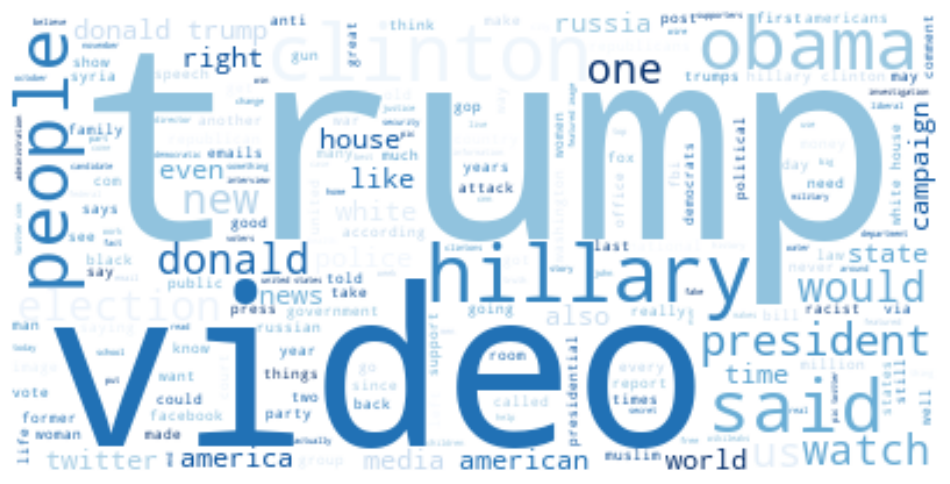

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(strip_accents="ascii", lowercase=True, stop_words=stop_words, max_features=500, ngram_range=(1,3))

words = vectorizer.fit_transform(real_corpus).toarray()
names = vectorizer.get_feature_names_out()
#real_words = real_words.todense().tolist()
df = pd.DataFrame(words, columns=names).sum(axis=0).transpose()

cloud = WordCloud(background_color="white", colormap="Blues").generate_from_frequencies(df)

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

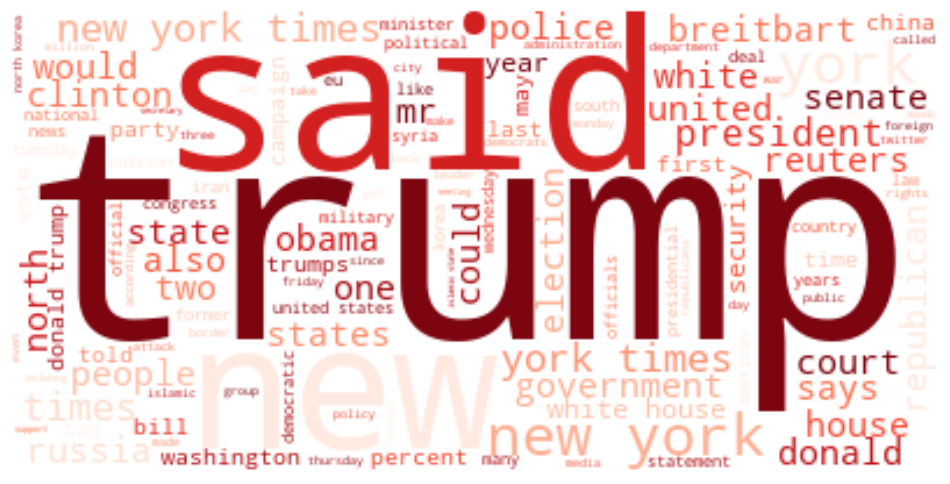

In [ ]:
vectorizer = TfidfVectorizer(strip_accents="ascii", lowercase=True, stop_words=stop_words, max_features=500, ngram_range=(1,3))

words = vectorizer.fit_transform(fake_corpus).toarray()
names = vectorizer.get_feature_names_out()
df = pd.DataFrame(words, columns=names).sum(axis=0).transpose()

cloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(df)

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()